# Gas Cloud
In this activity you will create your own word clouds using a subset of the Reuters corpus. 

In [127]:
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams, bigrams
import pandas as pd
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Code to download corpora
# import nltk
# nltk.download('reuters')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

In [3]:
# Get reuters stories where categories='gas'
ids = reuters.fileids(categories='gas')
corpus = [reuters.raw(i) for i in ids]
big_string = ' '.join(corpus)

In [4]:
sw = set(stopwords.words('english'))
sw_addon = {'said', 'mln', 'kilolitres','kl', 'also', 'could','would'}
sw_union = sw.union(sw_addon)

In [5]:
# Generate function to preprocess corpus for wordcloud creation
def process_text(article, swu):
    regex = re.compile("[^a-zA-Z ]")
    reg_clean = regex.sub('', article)
    t_word=word_tokenize(reg_clean)
    first_pass= [word.lower() for word in t_word if word.lower() not in swu]
    txt_out = [lemmatizer.lemmatize(word, pos='a') for word in first_pass if len(word)>2]
    return txt_out

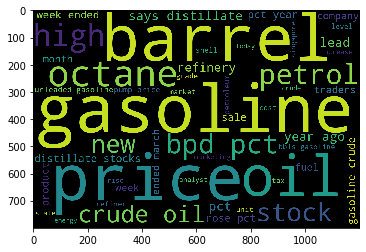

In [6]:
# Create wordcloud
input_text = ' '.join(process_text(big_string, sw_union))
wc= WordCloud(width=1200, height=800, max_words=50).generate(input_text)
plt.imshow(wc)

## Challenge

In [125]:
# Generate function to preprocess corpus for bigram wordclouds
def bigram_cloud(string, swu): 
    bigrams_list = ngrams(process_text(big_string, sw_union), n=2)
    output = [' '.join(i) for i in bigrams_list]
    return ' '.join(output)

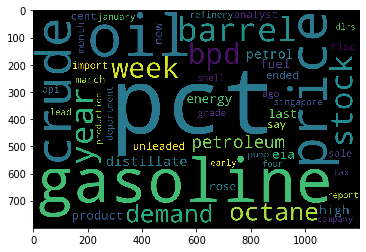

In [126]:
bg_cloud= WordCloud(width=1200, height=800, max_words=50, collocations=False).generate(bigram_cloud(big_string, sw_union))
plt.imshow(bg_cloud)

In [86]:
bigram_df = pd.DataFrame(list(zip(bgram_list, frequency_list)), columns=['bigram', 'frequency'])

In [119]:
#bigram_df.nlargest(20, 'frequency')

In [117]:
def bigram_freq(big_string, sw_union):
    """generate bigrm cloud using frequencies"""
    bigrams_list = Counter(ngrams(process_text(big_string, sw_union), n=2))
    bgram_list = [' '.join(tup) for tup in bigrams_list]
    frequency_list = [int(p) for p in bigrams_list.values()]
    freq_dict={} 
    i=0
    for bgram in bgram_list: 
        if i != len(bgram_list):
            freq_dict[bgram] = frequency_list[i]
            i += 1
    return freq_dict

In [ ]:
#generate bigrm cloud using frequencies
bg_cloud= WordCloud(width=1200, height=800, max_words=50, collocations=False).generate_from_frequencies(bigram_freq(big_string, sw_union))
plt.imshow(bg_cloud)